* 1ero importamos los paquetes

In [2]:
import pandas as pd 
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel


In [46]:
# Cargar los datos train
df = pd.read_csv('data/train.csv')

# Cargar los datos test
# df = pd.read_csv('data/test.csv')

In [4]:
df.head()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,9580,0.668999,58,2,0.449504,3425.0,9,1,1,1,1.0,0
1,39755,0.015922,71,0,6.000000,NaN,5,0,0,0,0.0,0
2,118799,0.183062,52,1,0.035593,5000.0,9,0,0,0,0.0,0
3,16489,0.162301,77,0,0.227886,2000.0,8,0,0,0,0.0,0
4,149857,0.404199,30,0,0.026010,5843.0,4,0,0,0,0.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84164 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102236 non-null  float64
 11  

In [6]:
df.columns

Index(['ID', 'RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

In [7]:
null_counts = df.isnull().sum()
print(null_counts)

ID                                          0
RevolvingUtilizationOfUnsecuredLines        0
Age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20836
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2764
SeriousDlqin2yrs                            0
dtype: int64


* Rellenar valores nulos.

In [8]:
# Rellenar los valores nulos en MonthlyIncome y NumberOfDependents
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         105000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    105000 non-null  float64
 11  

In [10]:
df

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,9580,0.668999,58,2,0.449504,3425.0,9,1,1,1,1.0,0
1,39755,0.015922,71,0,6.000000,5400.0,5,0,0,0,0.0,0
2,118799,0.183062,52,1,0.035593,5000.0,9,0,0,0,0.0,0
3,16489,0.162301,77,0,0.227886,2000.0,8,0,0,0,0.0,0
4,149857,0.404199,30,0,0.026010,5843.0,4,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
104995,79500,0.842886,33,0,0.182561,9300.0,10,0,0,0,1.0,0
104996,84928,0.805186,68,0,0.229466,5429.0,7,0,0,0,0.0,0
104997,56301,0.811494,51,2,3.709314,3016.0,26,0,4,0,0.0,1
104998,41912,0.412590,62,1,0.173290,14166.0,7,1,1,0,0.0,0


In [64]:
df['SeriousDlqin2yrs'].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.933486
1    0.066514
Name: proportion, dtype: float64

In [65]:
print(df.groupby('SeriousDlqin2yrs').size())

SeriousDlqin2yrs
0    98016
1     6984
dtype: int64


In [11]:
df.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,1.050000e+05,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,75006.458152,5.378324,52.325610,0.409352,352.044192,6.444949e+03,8.459952,0.254619,1.019010,0.228762,0.737981,0.066514
std,43315.742022,201.573457,14.766425,4.056717,1820.229318,1.453363e+04,5.134329,4.032506,1.131065,4.017864,1.107165,0.249180
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37590.750000,0.029974,41.000000,0.000000,0.174950,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74941.500000,0.154252,52.000000,0.000000,0.366061,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112542.500000,0.556035,63.000000,0.000000,0.870083,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149999.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


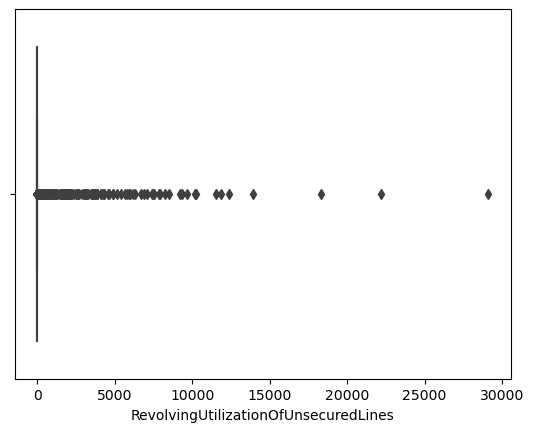

In [66]:
# Crear el boxplot para la característica 'MonthlyIncome'
sns.boxplot(x=df['MonthlyIncome'])

plt.show()

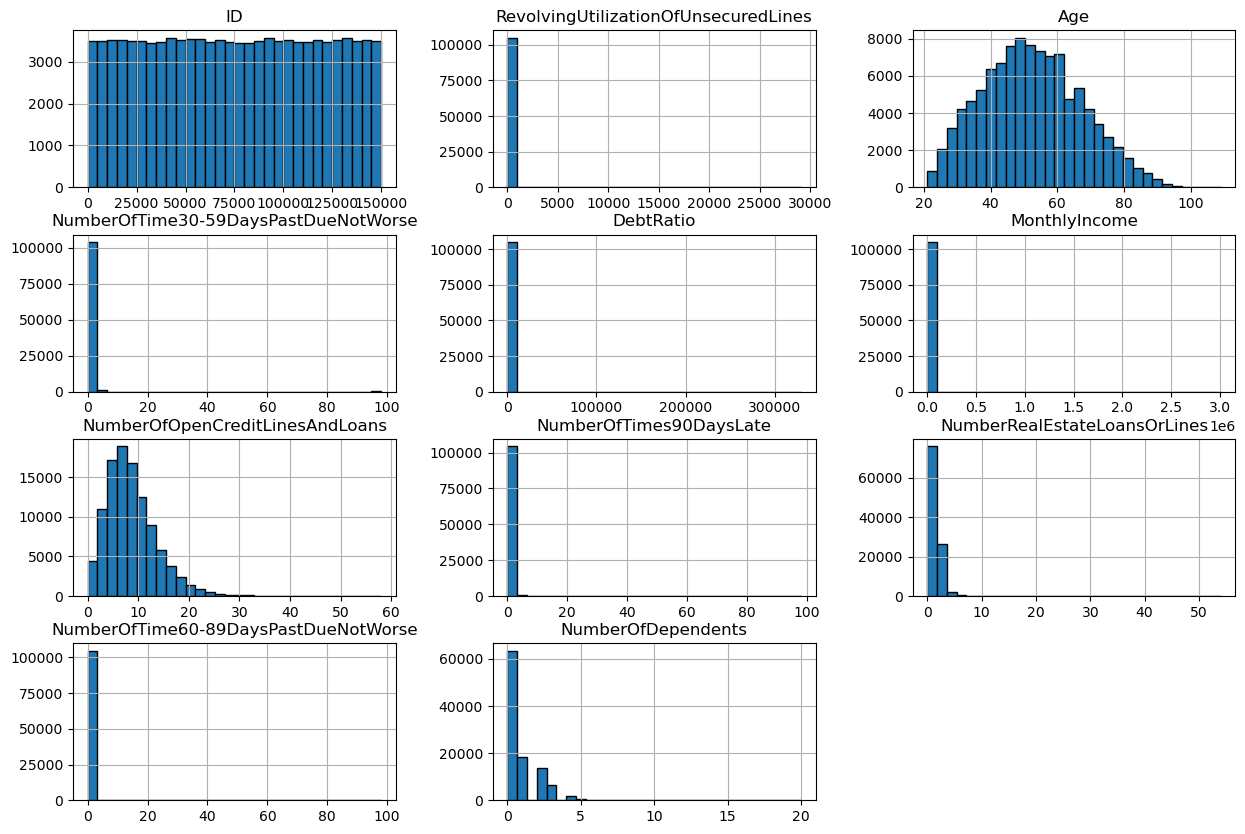

In [13]:
# Crear el histograma excluyendo la columna 'SeriousDlqin2yrs'
df.drop(['SeriousDlqin2yrs'], axis=1).hist(bins=30, figsize=(15, 10), edgecolor='black')

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

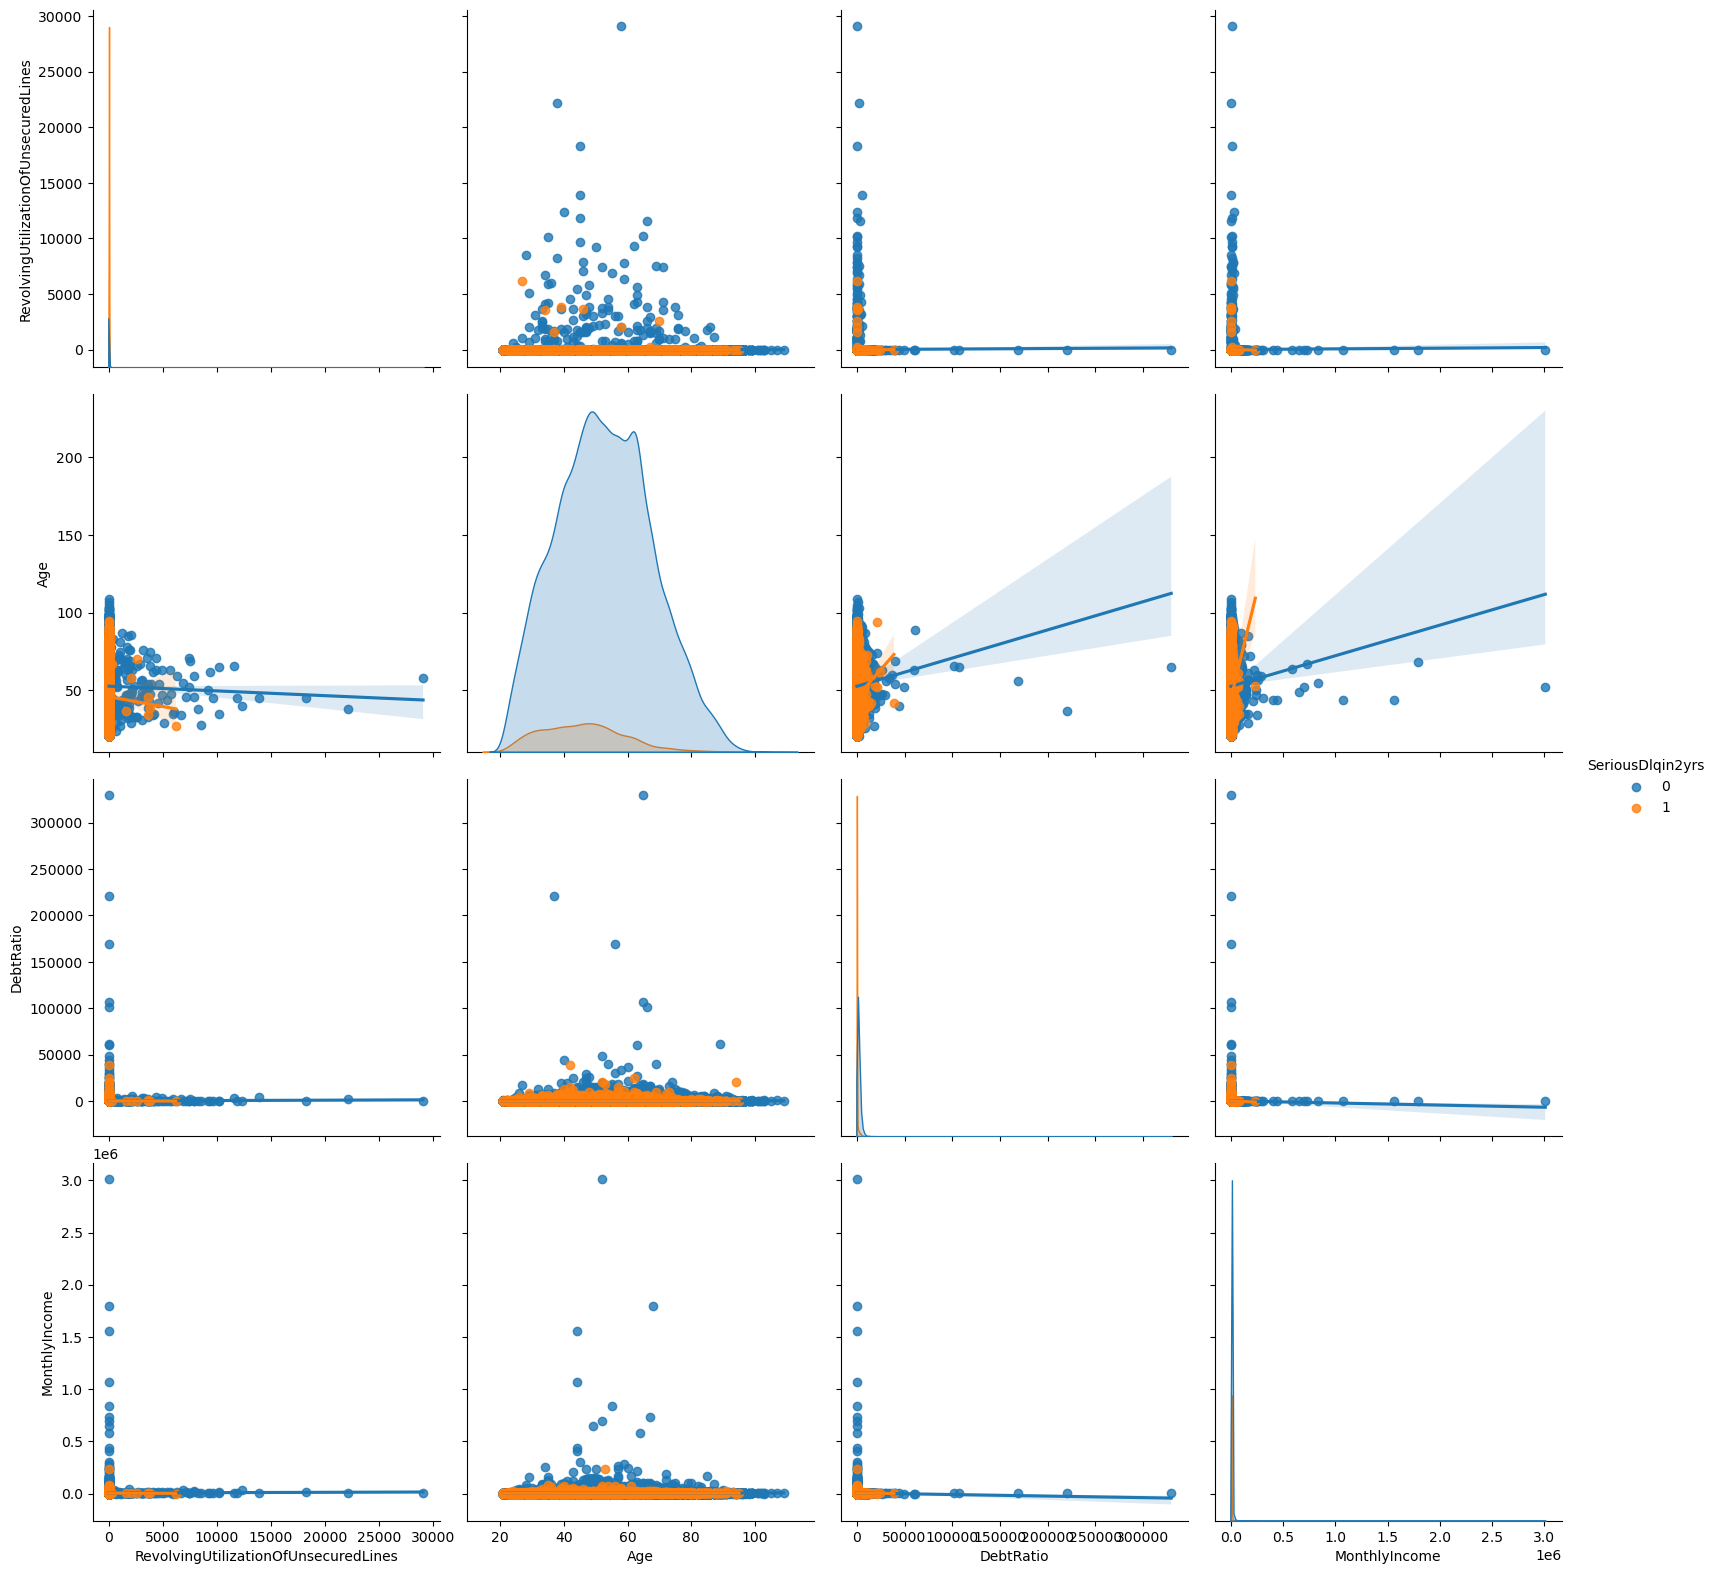

In [14]:
sns.pairplot(df.dropna(),
             hue='SeriousDlqin2yrs',
             height=4,
             vars=["RevolvingUtilizationOfUnsecuredLines", "Age", "DebtRatio", "MonthlyIncome"],
             kind='reg')  # "reg" de regresión lineal

plt.show()

* Normalización

In [15]:
# Seleccionar las características que deseas escalar
features = df.drop(columns=['ID', 'SeriousDlqin2yrs'])

# Aplicar la normalización
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Convertir a DataFrame y añadir las columnas ID y SeriousDlqin2yrs
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
normalized_df['ID'] = df['ID']
normalized_df['SeriousDlqin2yrs'] = df['SeriousDlqin2yrs']

normalized_df.head()

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,ID,SeriousDlqin2yrs
0,2.298175e-05,0.420455,0.020408,1.363521e-06,0.001138,0.155172,0.010204,0.018519,0.010204,0.05,9580,0
1,5.469547e-07,0.568182,0.000000,1.820035e-05,0.001795,0.086207,0.000000,0.000000,0.000000,0.00,39755,0
2,6.288625e-06,0.352273,0.010204,1.079671e-07,0.001662,0.155172,0.000000,0.000000,0.000000,0.00,118799,0
3,5.575425e-06,0.636364,0.000000,6.912676e-07,0.000665,0.137931,0.000000,0.000000,0.000000,0.00,16489,0
4,1.388521e-05,0.102273,0.000000,7.889725e-08,0.001942,0.068966,0.000000,0.000000,0.000000,0.00,149857,0


* Estandarización

In [16]:
# Aplicar la estandarización
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Convertir a DataFrame y añadir las columnas ID y SeriousDlqin2yrs
standardized_df = pd.DataFrame(standardized_features, columns=features.columns)
standardized_df['ID'] = df['ID']
standardized_df['SeriousDlqin2yrs'] = df['SeriousDlqin2yrs']

# Mostrar las primeras filas del DataFrame estandarizado
standardized_df.head()

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,ID,SeriousDlqin2yrs
0,-0.023363,0.384278,0.392104,-0.193160,-0.207791,0.105184,0.184844,-0.016807,0.191953,0.236659,9580,0
1,-0.026603,1.264658,-0.100908,-0.190111,-0.071899,-0.673889,-0.063142,-0.900934,-0.056936,-0.666553,39755,0
2,-0.025774,-0.022051,0.145598,-0.193388,-0.099422,0.105184,-0.063142,-0.900934,-0.056936,-0.666553,118799,0
3,-0.025877,1.670987,-0.100908,-0.193282,-0.305840,-0.089584,-0.063142,-0.900934,-0.056936,-0.666553,16489,0
4,-0.024677,-1.511924,-0.100908,-0.193393,-0.041418,-0.868658,-0.063142,-0.900934,-0.056936,-0.666553,149857,0


In [17]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['ID', 'SeriousDlqin2yrs'])
y = df['SeriousDlqin2yrs']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Mostrar las dimensiones de los conjuntos de datos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (73500, 10)
Tamaño del conjunto de prueba: (31500, 10)


In [19]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Crear y entrenar el modelo

In [20]:
# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

* Realizar predicciones en el conjunto de prueba

In [21]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular la métrica AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc}')

AUC: 0.8296367965321362


In [22]:
# Mostrar la importancia de las características
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

                                Feature  Importance
0  RevolvingUtilizationOfUnsecuredLines    0.191537
3                             DebtRatio    0.172558
4                         MonthlyIncome    0.143811
1                                   Age    0.128068
6               NumberOfTimes90DaysLate    0.092607
5       NumberOfOpenCreditLinesAndLoans    0.091982
2  NumberOfTime30-59DaysPastDueNotWorse    0.052737
8  NumberOfTime60-89DaysPastDueNotWorse    0.048266
9                    NumberOfDependents    0.042532
7          NumberRealEstateLoansOrLines    0.035902


Podemos ver las predicciones realizadas.

In [23]:
# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_pred_proba

array([0.05, 0.  , 0.  , ..., 0.02, 0.  , 0.38])

In [24]:
# Crear un DataFrame para comparar las predicciones con los valores reales
predictions_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred, 'Probabilidad': y_pred_proba})

# Mostrar las primeras filas del DataFrame
print(predictions_df.head())

       Real  Predicción  Probabilidad
77690     0           0          0.05
45234     0           0          0.00
30014     0           0          0.00
41947     0           0          0.00
8311      0           0          0.00


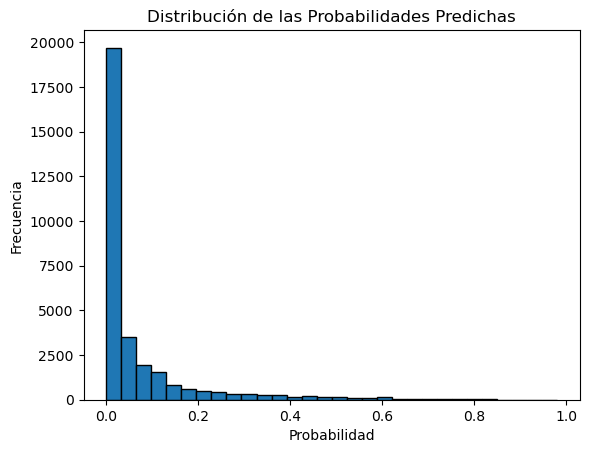

In [25]:
# Histograma de las probabilidades predichas
plt.hist(y_pred_proba, bins=30, edgecolor='black')
plt.title('Distribución de las Probabilidades Predichas')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[28999   335]
 [ 1803   363]]


* Ajuste de Hiperparámetros

In [27]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'Mejor AUC después de ajuste de hiperparámetros: {auc}')


Mejor AUC después de ajuste de hiperparámetros: 0.8526989691307066


* Eliminar características irrelevantes o redundantes puede mejorar el rendimiento del modelo.

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

# Crear el modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Seleccionar características importantes
selector = SelectFromModel(model, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Entrenar el modelo con las características seleccionadas
model.fit(X_train_selected, y_train)

# Evaluar el modelo
y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC después de selección de características: {auc}')

AUC después de selección de características: 0.7382102197878782


* Combinar múltiples modelos puede mejorar la precisión y la robustez del modelo final.

In [34]:
# Crear los modelos base
model1 = RandomForestClassifier(random_state=42)
model2 = LogisticRegression(random_state=42)
model3 = SVC(probability=True, random_state=42)

# Crear el ensamble de votación
ensemble = VotingClassifier(estimators=[
    ('rf', model1), ('lr', model2), ('svc', model3)],
    voting='soft')

# Entrenar el ensamble
ensemble.fit(X_train, y_train)

# Evaluar el ensamble
y_pred_proba = ensemble.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC del ensamble: {auc}')

AUC del ensamble: 0.8328664905059763


* Usar validación cruzada para evaluar el modelo en diferentes subconjuntos de datos puede proporcionar una mejor estimación de su rendimiento.

In [35]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo usando validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f'AUC promedio de validación cruzada: {cv_scores.mean()}')


AUC promedio de validación cruzada: 0.8378871557543592


In [ ]:
# Guardar los índices originales de X_test
X_test_indices = X_test.index

# Crear un DataFrame con las predicciones y los IDs correspondientes usando los índices originales
predictions_df = pd.DataFrame({'ID': df.loc[X_test_indices, 'ID'], 'SeriousDlqin2yrs': y_pred})

# Seleccionar solo las columnas necesarias y guardar el DataFrame de predicciones en un archivo CSV
predictions_df = predictions_df[['ID', 'SeriousDlqin2yrs']]
predictions_df.to_csv('predicciones.csv', index=False)

print("Archivo CSV 'predicciones.csv' guardado exitosamente.")

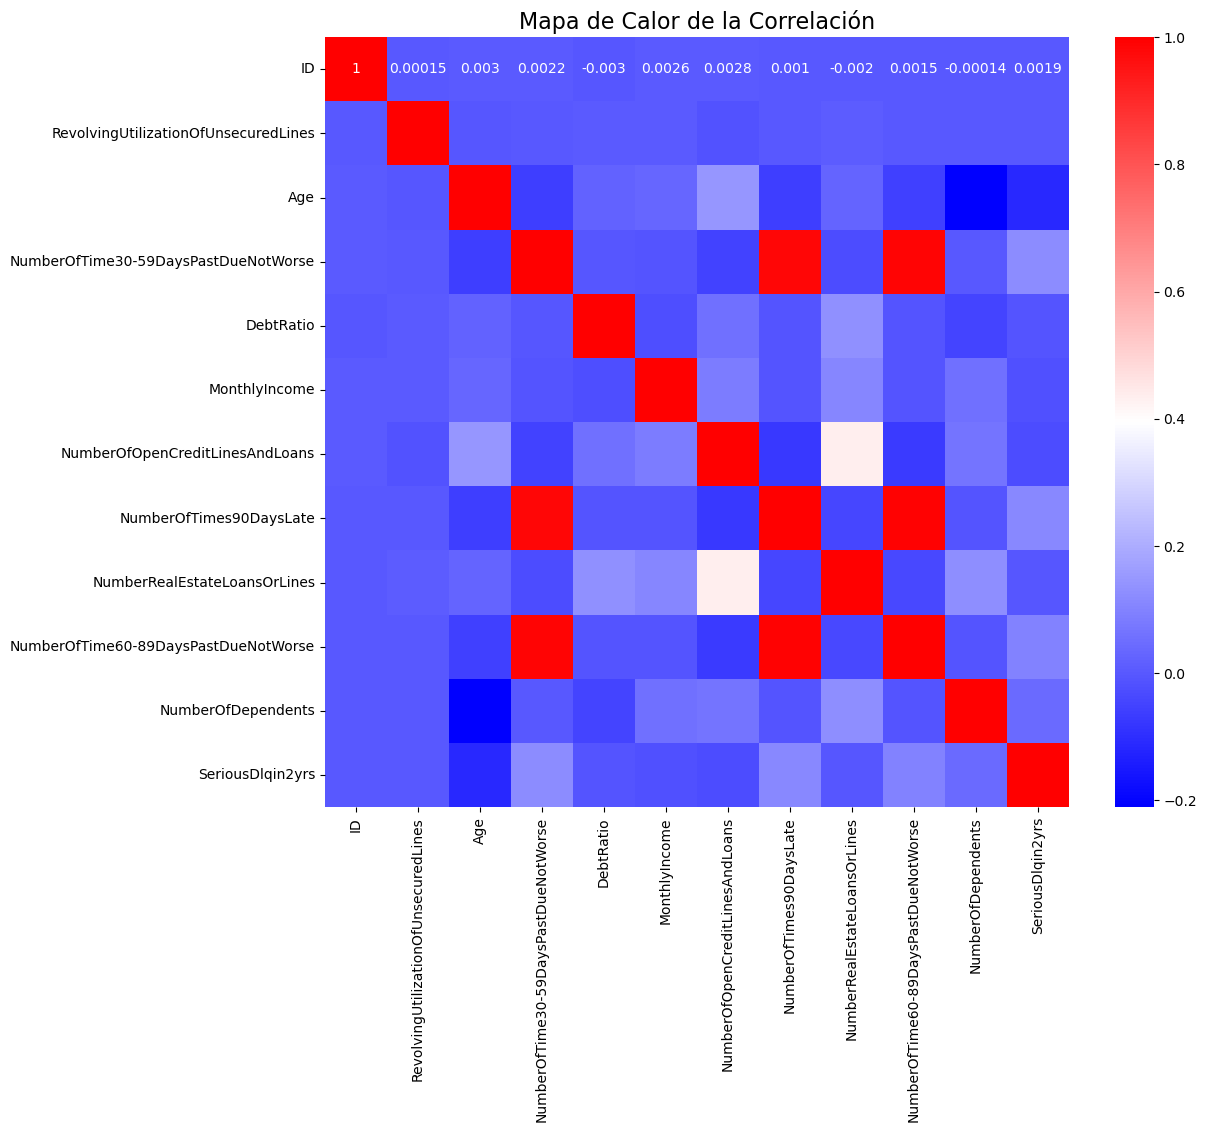

Defaulting to user installation because normal site-packages is not writeable
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         105000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


                                 feature  importance
3   NumberOfTime30-59DaysPastDueNotWorse    2.060722
7                NumberOfTimes90DaysLate    1.838824
10                    NumberOfDependents    0.093518
8           NumberRealEstateLoansOrLines    0.071469
0                                     ID    0.017726
1   RevolvingUtilizationOfUnsecuredLines   -0.009559
4                              DebtRatio   -0.025465
6        NumberOfOpenCreditLinesAndLoans   -0.032316
2                                    Age   -0.424558
5                          MonthlyIncome   -0.620518
9   NumberOfTime60-89DaysPastDueNotWorse   -3.743778
NumberOfTime60-89DaysPastDueNotWorse
0     99687
1      4023
2       784
3       207
98      172
4        77
5        27
6        12
96        4
7         4
8         2
9         1
Name: count, dtype: int64
count    105000.000000
mean          0.228762
std           4.017864
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


SeriousDlqin2yrs
0    0.933486
1    0.066514
Name: proportion, dtype: float64
Score de Random Forest: 0.9348571428571428
Score de Gradient Boosting: 0.9354285714285714
Score de SVM: 0.9336666666666666
AUC de Random Forest: 0.8090
AUC de Gradient Boosting: 0.8382
AUC de SVM: 0.4806


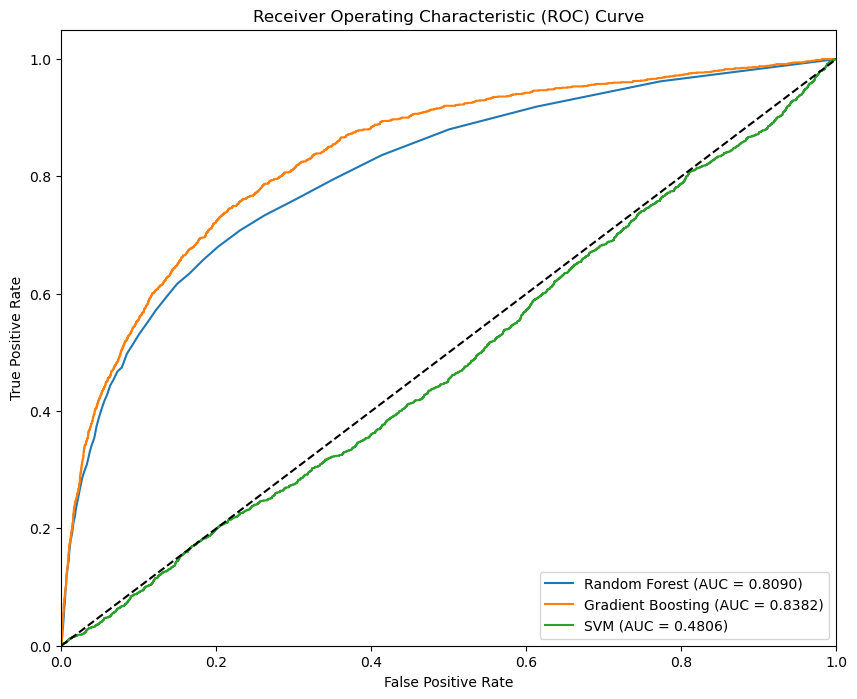

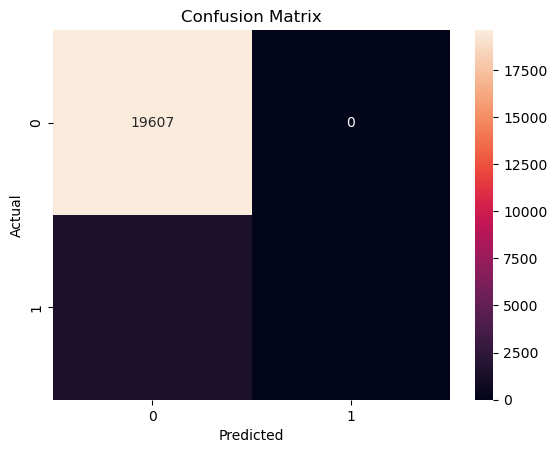

AUC-ROC medio de Random Forest con SMOTE: 0.7912 (+/- 0.0074)
AUC-ROC medio de Gradient Boosting con SMOTE: 0.8062 (+/- 0.0094)
AUC-ROC medio de Random Forest sin SMOTE: 0.8018 (+/- 0.0139)
AUC-ROC medio de Gradient Boosting sin SMOTE: 0.8349 (+/- 0.0110)


In [3]:
# %% [markdown]
# ##ENSEÑAME LA PASTA!!

# %%
import pandas as pd

dataframe = pd.read_csv('data/train.csv')

# %%
dataframe.head()

# %%
dataframe.describe()

# %%
dataframe.shape

# %%
dataframe.info

# %%
dataframe.isnull().sum()

# %%
import matplotlib.pyplot as plt

import seaborn as sns

correlation_matrix = dataframe.corr()

# %%
# Mediante un mapa de calor vamos a ver mejor como son estas correlaciones

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr')
plt.title('Mapa de Calor de la Correlación', fontsize=16)
plt.show()

# %% [markdown]
# *Se observa una alta correlacion de las variables de Numberoftime90daysLate y la variable NumberofTime 60-89DaysPastDueNotWorse, por lo tanto se podrian eliminar pues no dan explicabilidad o informacion adicional al modelo.

# %%
!pip install fancyimpute

# %%
#El dataframe y la tabla de test tienen muchos valores faltantes y vamos a imputarlos con la funcion Mice porque si los eliminamos puede que nos
#carguemos varios datos importantes
import pandas as pd
from statsmodels.imputation import mice


# %%
imputer = mice.MICEData(dataframe)


# %%
imputer.set_imputer('MonthlyIncome ')

# %%
imputed_data = imputer.data


# %%
imputed_data.info()

# %%
imputed_data['NumberOfDependents'].describe()

# %%
imputed_data['MonthlyIncome'].describe()

# %%
#SEPARAMOS EL DATASET DE X y la variable objetivo 

# %%
X = imputed_data.drop(columns="SeriousDlqin2yrs")

# %%
y = imputed_data["SeriousDlqin2yrs"]

# %%
from sklearn import model_selection

test_size = 0.20
seed = 7

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=test_size,
                                                                    random_state=seed)

# %% [markdown]
# *Por lo que hemos podido observar de los datos, los datos tienen diferentes magnitudes y seria conveniente escalarlos a varianza 1 y media 0

# %%
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# %%
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

# %%
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression()

log_r.fit(X_train_scal, Y_train)

y_pred = log_r.predict(X_test_scal)

# %%
log_r.score(X_test_scal, Y_test)

# %%
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, log_r.predict(X_test))

# %% [markdown]
# *Ya teníamos los datos imputados de la tabla Test , ahora nos faltaria escalarlos 

# %%
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': log_r.coef_[0]})
print(feature_importance.sort_values('importance', ascending=False))

# %%
print(dataframe['NumberOfTime60-89DaysPastDueNotWorse'].value_counts())
print(dataframe['NumberOfTime60-89DaysPastDueNotWorse'].describe())

# %%
delay_vars = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']
print(dataframe[delay_vars].corr())

# %% [markdown]
# Tras analizar la tabla de correlacion, se observan las siguientes conclusiones.
# 
# Multicolinealidad extrema:
# Todas estas variables están extremadamente correlacionadas entre sí, con coeficientes de correlación superiores a 0.98. Esto indica una multicolinealidad muy alta.
# Interpretación:
# 
# NumberOfTime30-59DaysPastDueNotWorse y NumberOfTime60-89DaysPastDueNotWorse: 0.986302
# NumberOfTime30-59DaysPastDueNotWorse y NumberOfTimes90DaysLate: 0.982646
# NumberOfTime60-89DaysPastDueNotWorse y NumberOfTimes90DaysLate: 0.992445
# 
# Estas correlaciones tan altas sugieren que estas variables están proporcionando esencialmente la misma información.
# Impacto en el modelo:
# La multicolinealidad extrema está causando problemas en la estimación de los coeficientes del modelo logístico. Esto explica por qué vimos un coeficiente negativo grande para NumberOfTime60-89DaysPastDueNotWorse.
# 
# Recomendaciones:
# 
# Eliminar variables redundantes:
# Dado que estas variables son prácticamente idénticas, deberías considerar mantener solo una de ellas en tu modelo. Por ejemplo, podrías quedarte con NumberOfTimes90DaysLate y eliminar las otras dos.

# %%
X_new = X.drop(columns=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'])

# %%
from sklearn import model_selection

test_size = 0.20
seed = 7

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_new,
                                                                    y,
                                                                    test_size=test_size,
                                                                    random_state=seed)

# %%
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# %%
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

# %%
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression()

log_r.fit(X_train_scal, Y_train)

y_pred = log_r.predict(X_test_scal)

# %%
log_r.score(X_test_scal, Y_test)

# %%
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, log_r.predict(X_test))

# %% [markdown]
# Seguimos sin mejorar mucho el score de AUC con la regresion logistica por lo tanto vamos a ver que sucede con otros modelos que no les afecta tanto la multicolinealidad. 

# %%
print(y.value_counts(normalize=True))

# %% [markdown]
# Tambien se observa que la variable objetivo está bastante descompensada porque el 93% de los datos son 0 y eso puede sesgar el modelo muchisimo.

# %% [markdown]
# Vamos a probar con unos algoritmos nuevos

# %%
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    print(f"Score de {name}: {model.score(X_test, Y_test)}")

# %%
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# %%
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, Y_train)
    
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)
    
    auc_score = roc_auc_score(Y_test, y_pred_proba)
    print(f"AUC de {name}: {auc_score:.4f}")
    
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# %%
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# %%
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Definir los modelos
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# SMOTE para el balanceo de clases
smote = SMOTE(random_state=42)

for name, model in models.items():
    # Crear un pipeline con SMOTE y el modelo
    pipeline = Pipeline([
        ('smote', smote),
        ('model', model)
    ])
    
    # Calcular AUC-ROC con validación cruzada
    auc_scores = cross_val_score(pipeline, X_new, y, cv=5, scoring='roc_auc')
    
    print(f"AUC-ROC medio de {name} con SMOTE: {auc_scores.mean():.4f} (+/- {auc_scores.std() * 2:.4f})")

# Para comparar, también calcula el AUC-ROC sin SMOTE
for name, model in models.items():
    auc_scores = cross_val_score(model, X_new, y, cv=5, scoring='roc_auc')
    print(f"AUC-ROC medio de {name} sin SMOTE: {auc_scores.mean():.4f} (+/- {auc_scores.std() * 2:.4f})")

# %%
new_data = pd.read_csv("data/test.csv")

# %%
#Tiene que tener los mismas columnas que X

new_data = new_data[X_train.columns]

# %%
new_data

# %%
# Imputar valores faltantes

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Puedes cambiar la estrategia según tus necesidades
new_data_imputed = pd.DataFrame(imputer.fit_transform(new_data), columns=new_data.columns)

# %%
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data_imputed)

# %%
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_model.fit(X_train, Y_train)

# %%
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scal, Y_train)

gb_predictions = gb_model.predict(new_data_scaled)
gb_probabilities = gb_model.predict_proba(new_data_scaled)[:, 1]

# %%
new_data['SeriousDlqin2yrs'] = gb_predictions

# %%
new_data

# %%
new_data.set_index('ID', inplace= True)

# %%
# Guardar los resultados
new_data['SeriousDlqin2yrs'].to_csv("new_data_with_predictions.csv")

In [4]:
new_data['SeriousDlqin2yrs'].to_csv("new_data_with_predictions.csv")